This notebook explores the FMNIST dataset in Keras.

In [1]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)
uint8


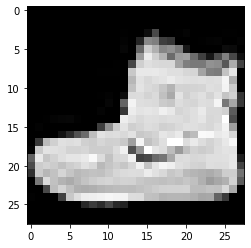

9
Ankle boot


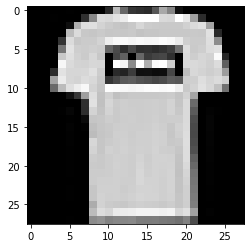

0
T-shirt/top


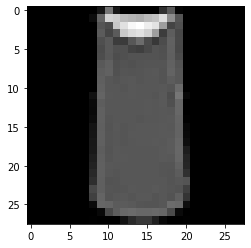

0
T-shirt/top


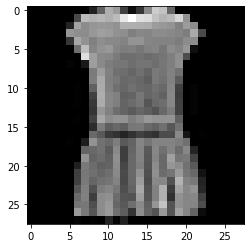

3
Dress


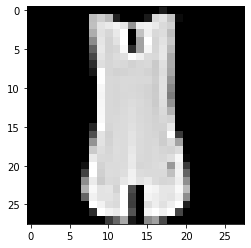

0
T-shirt/top


In [3]:
print(X_train_full.shape)
print(X_train_full.dtype)

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# print(X_train_full[0])

for k in range(5):
  plt.imshow(X_train_full[k],cmap="gray")
  plt.show()
  print(y_train_full[k])
  print(class_names[y_train_full[k]])

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

print(model.summary())

# there are model characteristics to show

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7297 - accuracy: 0.7589 - val_loss: 0.5097 - val_accuracy: 0.8306
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4913 - accuracy: 0.8293 - val_loss: 0.4460 - val_accuracy: 0.8538
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4479 - accuracy: 0.8437 - val_loss: 0.4416 - val_accuracy: 0.8454
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4193 - accuracy: 0.8538 - val_loss: 0.4165 - val_accuracy: 0.8578
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3994 - accuracy: 0.8598 - val_loss: 0.3853 - val_accuracy: 0.8706
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3837 - accuracy: 0.8659 - val_loss: 0.3849 - val_accuracy: 0.8656
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3700 - accuracy: 0.8702 - val_loss: 0.3798 - val_accuracy:

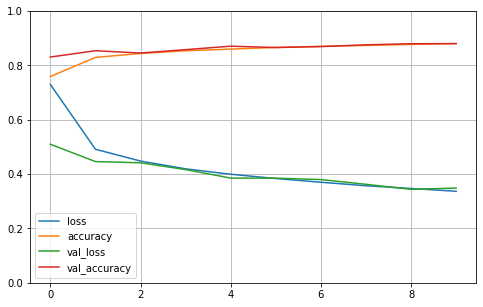

In [6]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

[[0.   0.   0.   0.   0.   0.06 0.   0.06 0.01 0.87]
 [0.   0.   0.99 0.   0.   0.   0.01 0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


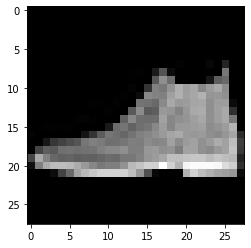

9
Ankle boot


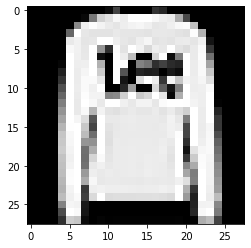

2
Pullover


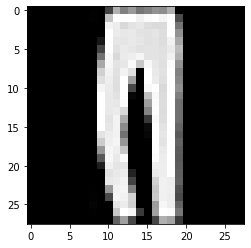

1
Trouser


In [9]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))

for k in range(3):
  plt.imshow(X_test[k],cmap="gray")
  plt.show()
  print(y_test[k])
  print(class_names[y_test[k]])